## Introduction

The aim of this notebook is using the McDonald’s customer review dataset to outline the main talking points of the reviews at each rating and to explore the geographical location of McDonald branches in regards to customer sentiment. In the first section of the notebook, the main talking points of the reviews were vectorized using TF-IDF and were clustered using KMeans (with varying cluster sizes), and then word clouds of the clusters were produced. In the second section, the geographical location of the stores and their average rating were displayed on a heatmap and cartopy. If you enjoy/find this helpful make sure to give me an upvote, and any feedback and criticism is also welcomed !

## Importing relevant libraries and reading the dataset

In [1]:
import pandas as pd 
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(0)
random.seed(0)


In [2]:
# loading McDonald's dataset
df = pd.read_csv('/kaggle/input/mcdonalds-store-reviews/McDonald_s_Reviews.csv', encoding='latin-1')
df.head(20)


,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star
5,6,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 weeks ago,I work for door dash and they locked us all ou...,1 star
6,7,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,If I could give this location a zero on custo...,1 star
7,8,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a year ago,Came in and ordered a Large coffee w/no ice. T...,1 star
8,9,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Went thru drive thru. Ordered. Getting home no...,1 star
9,10,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,"I'm not really a huge fan of fast food, but I ...",4 stars


## Inspecting dataset

<Axes: xlabel='rating', ylabel='count'>

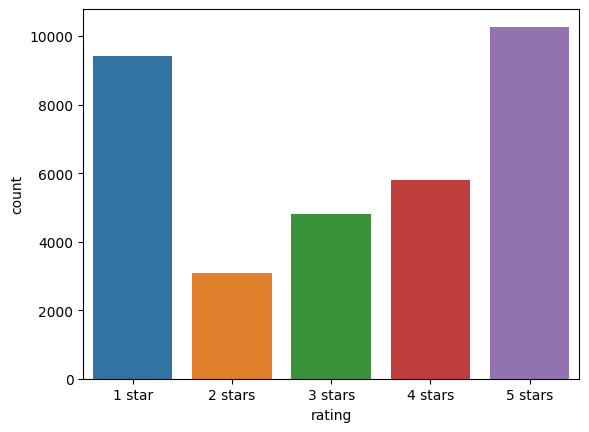

In [3]:
# count of ratings 
sns.countplot(data=df, x=df.rating, order=['1 star', '2 stars', '3 stars', '4 stars', '5 stars'])

In [4]:
# example of 1 star review 
df[df.rating == '1 star'].iloc[0].review

'Why does it look like someone spit on my food?\nI had a normal transaction,  everyone was chill and polite, but now i dont want to eat this. Im trying not to think about what this milky white/clear substance is all over my food, i d*** sure am not coming back.'

In [5]:
# example of 5 star review
df[df.rating == '5 stars'].iloc[1].review

'The staff are very friendly and they do their job perfectly'

In [6]:
df.isnull().sum()

reviewer_id        0
store_name         0
category           0
store_address      0
latitude         660
longitude        660
rating_count       0
review_time        0
review             0
rating             0
dtype: int64

There seems to be 660 entries for latitude and longitude that are missing. This is something that we worry about later in the Geographical analysis section.

In [7]:
df.duplicated().sum()

0

In [8]:
# convert rating from string to an int 
rating_map = {"1 star": 1,
              "2 stars": 2, 
              "3 stars": 3, 
              "4 stars": 4,
              "5 stars": 5
             }

df['rating'] = df['rating'].map(rating_map)
df.head(5)

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1


For simplicity and convenience, we convert the string rating labels to integer labels.

# Summary of Reviews

## Cleaning & Preprocessing

In [9]:
# cleaning
import re
import string

def clean(review):
    review = review.lower()
    review = review.replace('ï', '')
    review = review.replace('¿', '')
    review = review.replace('½', '')
    review = review.replace('ý', '')
    review = " ".join(review.split())
    review = review.rstrip()
    return review

df['clean_review'] = [clean(review) for review in df['review']]
df['clean_review'].head(20)

0     why does it look like someone spit on my food?...
1     it'd mcdonalds. it is what it is as far as the...
2     made a mobile order got to the speaker and che...
3     my mc. crispy chicken sandwich was customer se...
4     i repeat my order 3 times in the drive thru, a...
5     i work for door dash and they locked us all ou...
6     if i could give this location a zero on custom...
7     came in and ordered a large coffee w/no ice. t...
8     went thru drive thru. ordered. getting home no...
9     i'm not really a huge fan of fast food, but i ...
10                                       worst mcdonald
11    we stopped by for a quick breakfast. it was no...
12    the morning crew seems fast and efficient. nig...
13    today, i was disappointed in that restaurant #...
14    ordered food burger wrong and left out part of...
15    this was a dine in experience. the tables were...
16    the line ws extremely big and was moving very ...
17    the boy who attended me made me wait and w

Simple cleaning process, making sure that strange symbols found in the dataset, that could obstruct our analysis, are removed.

## Clustering text similarity

### TF-IDF

We create a list of TF-IDF for each rating label and a dictionary for the vocabuluary of each rating. Then we examine the top-ranked words determined by the summed TF-IDF.

In [10]:
# create tf-idf and vocab list for each rating 
from sklearn.feature_extraction.text import TfidfVectorizer 

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_list = []
tfidf_vocab = {}


for rating in sorted(df.rating.unique()):
    tfidf_list.append(tfidf_vectorizer.fit_transform(df[df.rating == rating].clean_review))
    tfidf_vocab[rating] = tfidf_vectorizer.get_feature_names_out()

[print(f'\nRating: {rating} stars', '\nTFIDF array: ', tfidf.toarray(), '\nVocab list: ', tfidf_vocab[rating]) for rating, tfidf in zip(sorted(df.rating.unique()), tfidf_list)]


Rating: 1 stars 
TFIDF array:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
Vocab list:  ['00' '000' '0000000' ... 'zombies' 'zone' 'zoo']

Rating: 2 stars 
TFIDF array:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
Vocab list:  ['00' '00am' '01' ... 'yummy' 'zero' 'zoo']

Rating: 3 stars 
TFIDF array:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
Vocab list:  ['00' '01' '02' ... 'zero' 'zone' 'zoo']

Rating: 4 stars 
TFIDF array:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
Vocab list:  ['00' '00pm' '10' ... 'yummy' 'yup' 'zoo']

Rating: 5 sta

[None, None, None, None, None]

In [11]:
# examining top-ranked words in 2 stars 
df_rank = pd.DataFrame({'Words': tfidf_vocab.get(2), 'Summed TFIDF': tfidf_list[1].toarray().sum(axis=0)}).sort_values('Summed TFIDF', ascending=False)
df_rank.head(20)

,Words,Summed TFIDF
2996,poor,329.160506
1581,food,117.616626
3497,service,104.142069
2780,order,98.940030
3619,slow,88.369899
2448,mcdonald,68.059931
1262,drive,66.694328
1734,good,59.773835
4040,time,51.700115
2282,like,48.875466


### Dimensionality reduction to perform all-by-all cosine similarities (TruncatedSVD)

We use TruncatedSVD dimensionality reduction to allow us to perform all-by-all cosine similarities, which improves our metric for similarity between reviews, and allow for better clustering using K-Means.

In [12]:
# dimensionality reduction to perform all-by-all cosine similarities 
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize


shrunk_norm_matrix_list = []

for tfidf in tfidf_list:
    shrunk_norm_matrix_list.append(normalize(TruncatedSVD(n_components=100, random_state=42).fit_transform(tfidf)))
    
cosine_similarity_matrix = [shrunk_norm_matrix @ shrunk_norm_matrix.T for shrunk_norm_matrix in shrunk_norm_matrix_list]
cosine_similarity_matrix

[array([[ 1.        ,  0.12088323, -0.0078843 , ..., -0.00762407,
         -0.0052868 ,  0.10019433],
        [ 0.12088323,  1.        ,  0.06783246, ..., -0.02090068,
         -0.0258837 ,  0.02193616],
        [-0.0078843 ,  0.06783246,  1.        , ...,  0.02252939,
          0.14367982,  0.10065092],
        ...,
        [-0.00762407, -0.02090068,  0.02252939, ...,  1.        ,
          0.5952827 ,  0.07540192],
        [-0.0052868 , -0.0258837 ,  0.14367982, ...,  0.5952827 ,
          1.        ,  0.10612319],
        [ 0.10019433,  0.02193616,  0.10065092, ...,  0.07540192,
          0.10612319,  1.        ]]),
 array([[ 1.        ,  0.11738598,  0.05866192, ...,  0.19254422,
          0.059129  ,  0.01689466],
        [ 0.11738598,  1.        , -0.01017104, ...,  0.00998012,
          0.03093797,  0.01527998],
        [ 0.05866192, -0.01017104,  1.        , ..., -0.01349031,
          0.02476878, -0.02894549],
        ...,
        [ 0.19254422,  0.00998012, -0.01349031, ...,  

### Optimization of K parameter in KMeans using an Elbow Plot 

We generate an elbow plot of k values ranging from 1 to 61. MiniBatchKMeans is chosen for generating the elbow plot rather than KMeans to reduce runtime.

In [13]:
# elbow curve function
from sklearn.cluster import MiniBatchKMeans
import time

np.random.seed(0)
def generate_elbow_plot(matrix_list):
    start_time = time.time()
    for index, matrix in enumerate(matrix_list):
        k_values = range(1, 61)
        inertia_values = [MiniBatchKMeans(k, random_state=42).fit(matrix).inertia_ for k in k_values]
        plt.plot(k_values, inertia_values, label=[f'{index+1} star'])
        plt.xlabel('K')
        plt.ylabel('Inertia')
        plt.grid(True)
        plt.legend()
    plt.show()
    return print(f'{round(time.time() - start_time)} seconds')

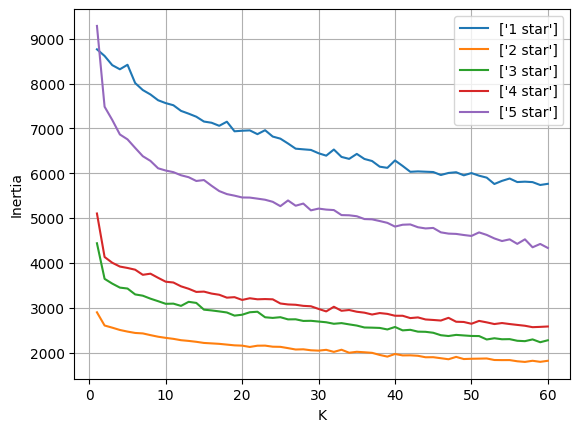

93 seconds


In [14]:
import warnings
warnings.filterwarnings("ignore")

# elbow curve of all ratings
generate_elbow_plot(shrunk_norm_matrix_list)

From the elbow plot it is difficult to determine the optimal k parameter value, however, we can start with a k value of 10 and then investigate the effect of a k value of 5 and 15. 

### KMeans Clustering & Wordclouds (K = 10)

We perform KMeans clustering on the reviews at each different rating with a k value of 10. We then create wordclouds of the top ranked words (determined by summed TF-IDF) for each rating to ideally gain insight on precise words used in customers feedback.

In [15]:
# function that creates KMeans for reviews
from sklearn.cluster import KMeans

def compute_cluster_groups(shrunk_norm_matrix, k=10, review=df['clean_review']):
    cluster_model = KMeans(n_clusters=k, random_state=42)
    clusters = cluster_model.fit_predict(shrunk_norm_matrix)
    df = pd.DataFrame({'Index' : range(clusters.size), 'Cluster' : clusters, 'Review' : review})
    return [df_cluster for _, df_cluster in df.groupby('Cluster')]

In [16]:
# computes clusters for each seperate rating 
cluster_groups = []

for index, rating in enumerate(sorted(df.rating.unique())):
    cluster_groups.append(compute_cluster_groups(shrunk_norm_matrix_list[index], review=df[df.rating == rating].clean_review))
    
print([("For: ", rating, "\n", cluster_groups[index]) for index, rating in enumerate(sorted(df.rating.unique()))][:10])


[('For: ', 1, '\n', [       Index  Cluster                                             Review
10         7        0                                     worst mcdonald
33        21        0  just spent 10 minutes waiting at this mcdonald...
233      119        0  worst mcdonald's. ever when to pick up an orde...
271      135        0  it has been many years since i have gone into ...
551      180        0                                  it was mcdonald's
...      ...      ...                                                ...
33274   9397        0  the slowest mcdonald's i've ever met, i've nev...
33298   9405        0  the worst mcdonald's in miami, horrible waitin...
33306   9408        0  the worst service. the staff is rude, the food...
33308   9409        0  it's like any mcdonald's except that the servi...
33314   9412        0  the worst mcdonald's! the attention is terribl...

[600 rows x 3 columns],        Index  Cluster                                             Review
0    

In [17]:
# cluster 0 in 1 stars
cluster_groups[0][0]

,Index,Cluster,Review
10,7,0,worst mcdonald
33,21,0,just spent 10 minutes waiting at this mcdonald...
233,119,0,worst mcdonald's. ever when to pick up an orde...
271,135,0,it has been many years since i have gone into ...
551,180,0,it was mcdonald's
...,...,...,...
33274,9397,0,"the slowest mcdonald's i've ever met, i've nev..."
33298,9405,0,"the worst mcdonald's in miami, horrible waitin..."
33306,9408,0,"the worst service. the staff is rude, the food..."
33308,9409,0,it's like any mcdonald's except that the servi...


In [18]:
from wordcloud import WordCloud

def cluster_to_wordcloud(cluster_group, max_words=10):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(cluster_group)
    vocab_list = vectorizer.get_feature_names_out()
    
    # create a rank list of words
    df_ranked = pd.DataFrame({'Word' : vocab_list, 'Sum TFIDF': tfidf_matrix.toarray().sum(axis=0)}).sort_values('Sum TFIDF', ascending=False)
    
    # create word score
    word_to_score = {word: score for word, score in df_ranked[:max_words].values}
    
    # initialize wordcloud object
    wordcloud_generator = WordCloud(background_color='white')

    # fit wordcloud_generator to word_to_score
    wordcloud_image = wordcloud_generator.fit_words(word_to_score)
    
    return wordcloud_image
    

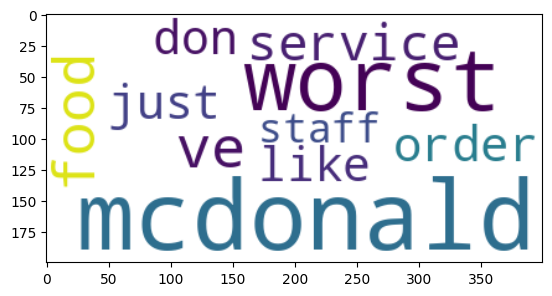

In [19]:
# wordcloud of the first cluster for 1 star reviews
wordcloud_image = cluster_to_wordcloud(cluster_groups[0][0].Review)
plt.imshow(wordcloud_image, interpolation='bilinear')


In [20]:
def grid_wordcloud(cluster_groups, rating_num, max_words=10, rows=5, columns=2, figsize=(10,10)):
    rating_list = []
    fig, ax = plt.subplots(rows, columns, figsize=figsize)
    for index, cluster in enumerate(cluster_groups):
        row = index // columns
        column = index % columns
        wordcloud_image = cluster_to_wordcloud(cluster_groups[index].Review, max_words)
        ax[row][column].imshow(wordcloud_image, interpolation='bilinear')
        ax[row][column].set_title(f'Cluster: {index}')
        ax[row][column].set_xticks([])
        ax[row][column].set_yticks([])
    fig.suptitle(f"{rating_num}:", fontsize=20)


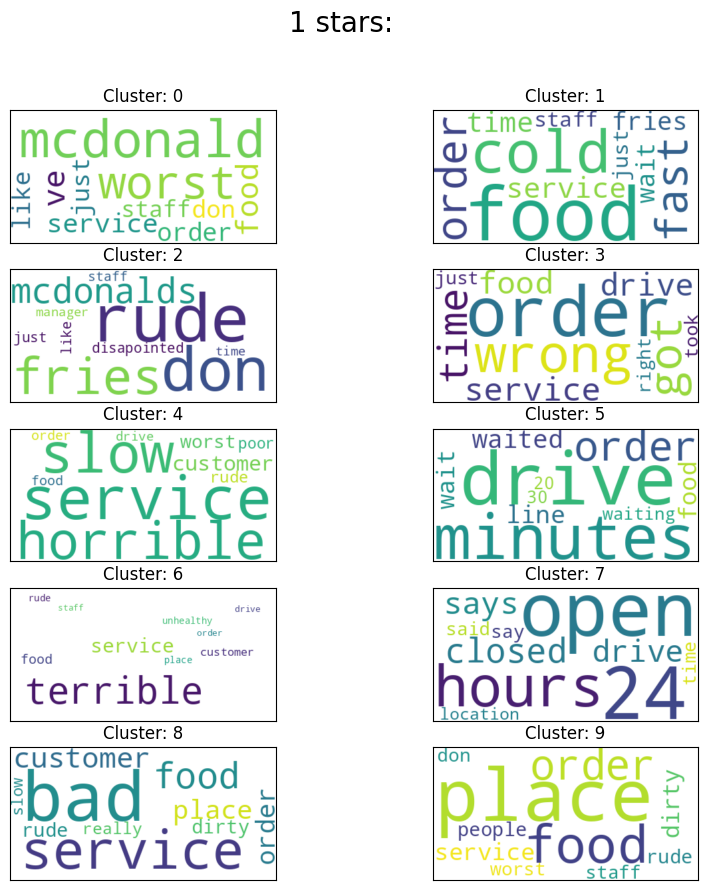

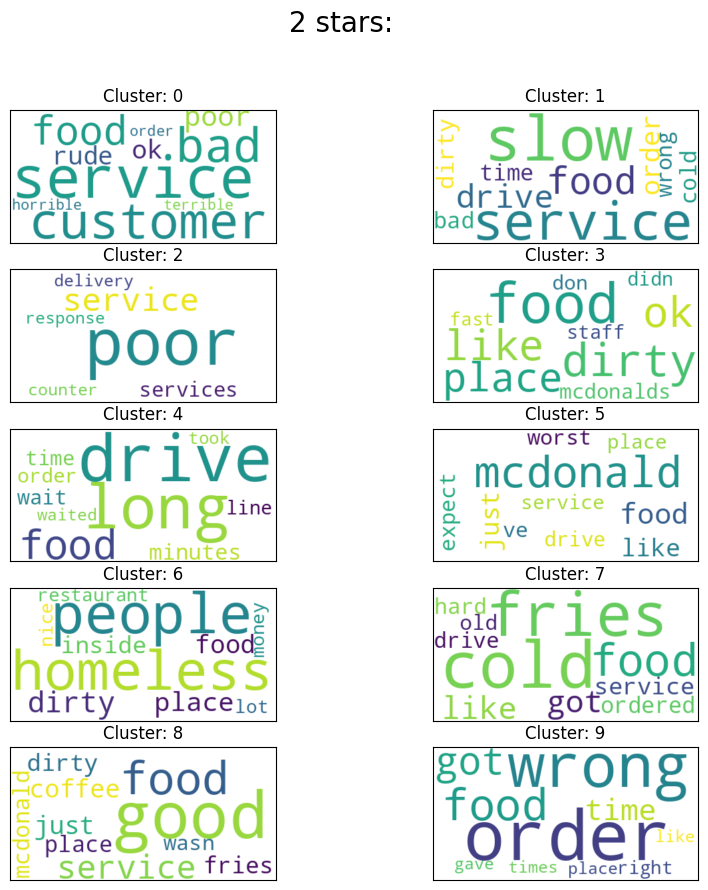

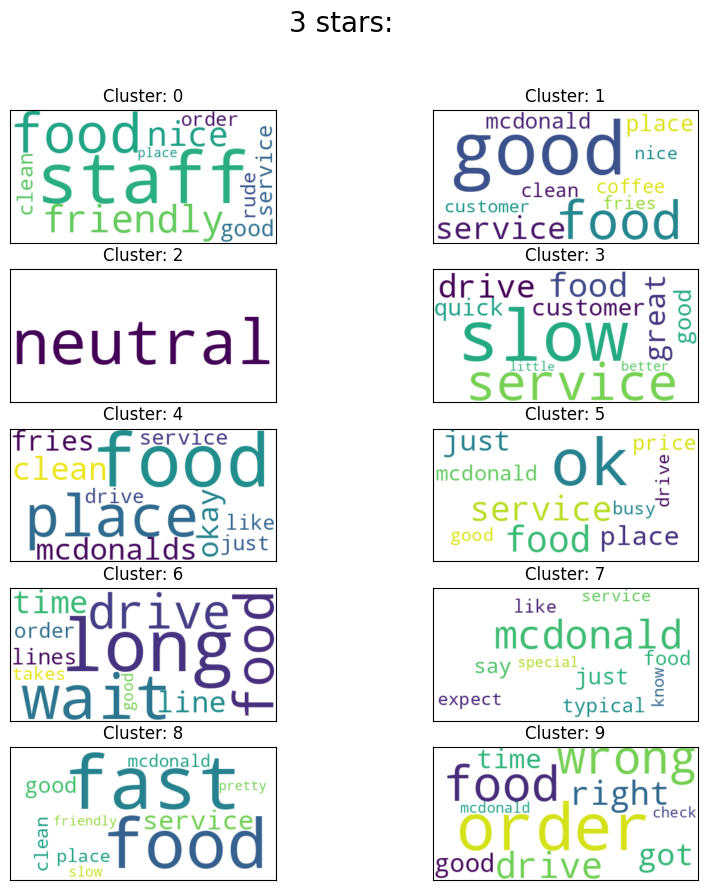

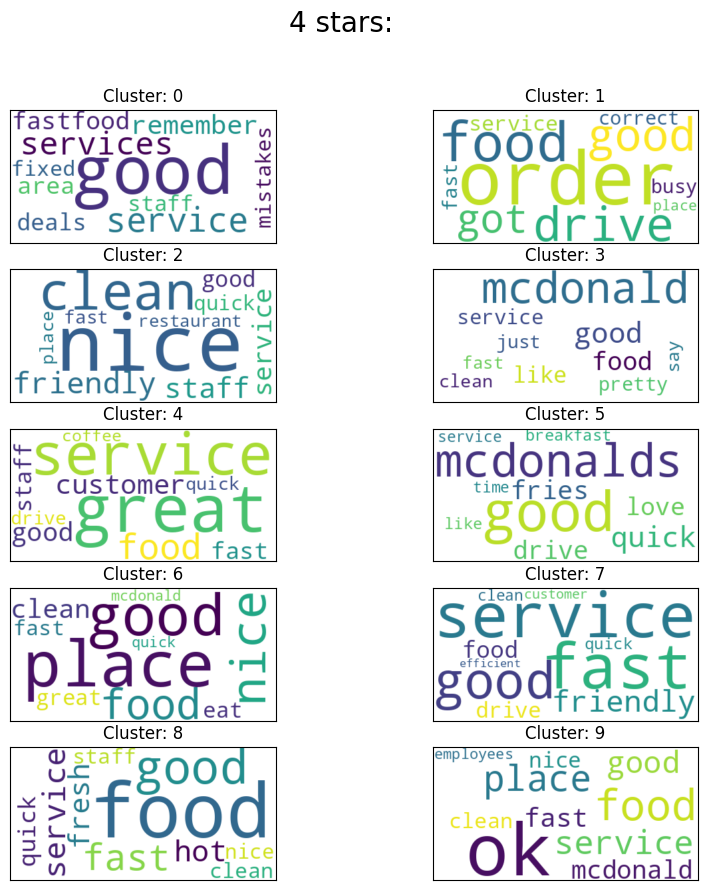

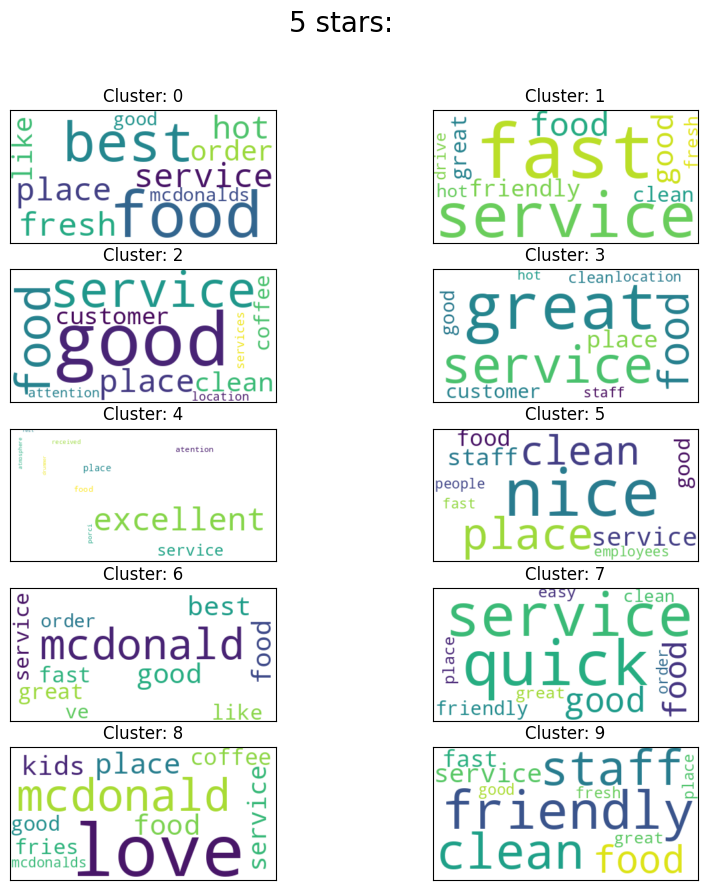

In [21]:
# all clusters wordclouds for each rating
for index, rating in enumerate(sorted(df.rating.unique())):
    grid_wordcloud(cluster_groups[index], rating_num=f'{rating} stars')

### Interpretation of WordClouds (K = 10)

1 star ratings:
* Cluster 0: Poor service, rude staff and worst McDonald's store they've been to.
* Cluster 1: Cold food (specifically fries), long waiting time for their order, and horrible service.
* Cluster 2: Rude staff/manager, bad fries and overall disappointed.
* Cluster 3: Poor service and received the wrong order which they waited a while for.
* Cluster 4: People found it horrible, more specifically in regards to their order (how long it took) and rude service.
* Cluster 5: People waited a long time (20-30 minutes) for their order in the drive-through.
* Cluster 6: People didn't enjoy their experience in regards to rude staff and service, and claim the food is unhealthy and overall terrible.
* Cluster 7: Stores that might claim that their store is open 24 hours for drive-through, are actually not open 24 hours.
* Cluster 8: Customer service was poor or the worst they've experienced and slow service.
* Cluster 9: Bad service, rude manager, dirty environment and issues with order.

2 star ratings:
* Cluster 0: Bad service, dirty/bad food and order was either the wrong one or was slow.
* Cluster 1: People didn't like the food, staff and slow service.
* Cluster 2: Poor service/delivery.
* Cluster 3: It is unclear what people, wehter the food or staff. Regardless, the place was dirty.
* Cluster 4: It took long to get the order in the drive-through
* Cluster 5: Worst McDonalds/service/food but was what they expected.
* Cluster 6: Maybe some aspects were nice (although not clear what aspects exactly) but the store (more specifically potentially the tables) were dirty and there were homeless people inside the store.
* Cluster 7: Fries and food got cold and hard.
* Cluster 8: It is unclear what is good, whether that be the fries, coffee, or service. However, regardless the place was dirty. 
* Cluster 9: Reveived wrong order and took awhile.

3 star ratings: 
* Cluster 0: Either friendly or rude staff, clean place, and good food.
* Cluster 1: Good service, food, coffee and clean
* Cluster 2: People had a neutral feeling towards the store.
* Cluster 3: The service (maybe more specifically in the drive-through) was slow but nice, and the food was food. Some refered the store as super.
* Cluster 4: Clean place, okay food and more specifically fries.
* Cluster 5: Ok food, service, and place. People also find the prices were good.
* Cluster 6: Long waits and lines but good food.
* Cluster 7: The service, food and store was what they expected or typical, and wasn't anything special (although it isn't clear whether the word special was used in a negative tone, I assume it was as the rating was only 3 stars for a reason).
* Cluster 8: Some say the service was slow and some say it was fast. Clean and friendly place.
* Cluster 9: It is unclear what was right or wrong (was it right time or right order or wrong time or wrong order?) but the staff was good.

4 star ratings:
* Cluster 0: Good fast service, staff, deals, food, and area. Although unclear, there seems to be some mistakes that they found.
* Cluster 1: Fast service, good food and place. However, the drive-through got busy.
* Cluster 2: Clean place, nice restaurant and quick service.
* Cluster 3: Clean McDonalds store, fast service and pretty good food.
* Cluster 4: Great service and quick service with good food.
* Cluster 5: People loved the food, and specifically the fries and breakfast, and the food came fast.
* Cluster 6: People found the store, service, staff, and food nice. Furthermore, the place was clean and the order came fast.
* Cluster 7: The food was good, friendly, quick and efficient service, and clean store.
* Cluster 8: Service was considered good, the store was clean, the food came quick, and was fresh and hot.
* Cluster 9: The store was clean, the food came fast, and it seems there is mixed sentiment with the overall place and employees with some saying it is good/ncie and some saying it is ok.

5 star ratings:
* Cluster 0: Best food that came fresh and hot, and good service.
* Cluster 1: The staff was friendly, and the food came fast and was fresh and hot.
* Cluster 2: Good and friendly service that paid attention, great location, good coffee, clean place, and good food.
* Cluster 3: Great food, service, location, staff and clean place.
* Cluster 4: Excellent service.
* Cluster 5: Nice and clean place with good food and fast service. Specifically people liked their staff and employees.
* Cluster 6: Their order came fast, considered the food great and would clam that the store is the best.
* Cluster 7: Quick service, clean place with great food and friendly staff.
* Cluster 8: People loved the service, food (spefically the fries) and coffee, and claimed it was kid friendly.
* Cluster 9: Fast service, clean place, friendly staff, and great food.

Overall, it seems that although the clusters provide great insight, some of the clusters overlap and should be all in one cluster. For that reason, it seems unnecessary to investigate a k value higher than 10. 

### Clustering size of 5

In [22]:
# computes clusters for each seperate rating with a cluster size of 5
cluster_groups = []

for index, rating in enumerate(sorted(df.rating.unique())):
    cluster_groups.append(compute_cluster_groups(shrunk_norm_matrix_list[index], k=5, review=df[df.rating == rating].clean_review))
    
print([("For: ", rating, "\n", cluster_groups[index]) for index, rating in enumerate(sorted(df.rating.unique()))][:10])


[('For: ', 1, '\n', [       Index  Cluster                                             Review
5          3        0  i work for door dash and they locked us all ou...
7          5        0  came in and ordered a large coffee w/no ice. t...
8          6        0  went thru drive thru. ordered. getting home no...
10         7        0                                     worst mcdonald
12         8        0  the morning crew seems fast and efficient. nig...
...      ...      ...                                                ...
33341   9419        0   very, very time consuming to deliver the snacks.
33346   9421        0  attitude of the managers as if she were the ow...
33349   9423        0                   no good unhealthy dirty bathroom
33374   9427        0                   horrible the lines take too long
33391   9430        0                        they treated me very badly.

[4891 rows x 3 columns],        Index  Cluster                                             Review
2   

In [23]:
# cluster 0 in 1 stars
cluster_groups[0][0]

,Index,Cluster,Review
5,3,0,i work for door dash and they locked us all ou...
7,5,0,came in and ordered a large coffee w/no ice. t...
8,6,0,went thru drive thru. ordered. getting home no...
10,7,0,worst mcdonald
12,8,0,the morning crew seems fast and efficient. nig...
...,...,...,...
33341,9419,0,"very, very time consuming to deliver the snacks."
33346,9421,0,attitude of the managers as if she were the ow...
33349,9423,0,no good unhealthy dirty bathroom
33374,9427,0,horrible the lines take too long


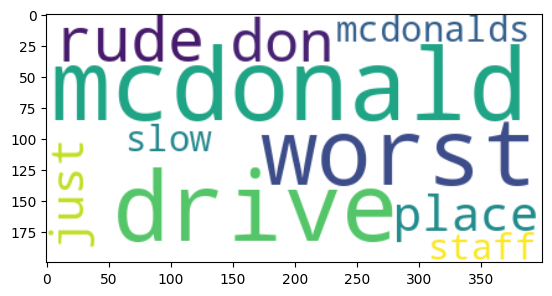

In [24]:
# wordcloud of the first cluster for 1 star reviews
wordcloud_image = cluster_to_wordcloud(cluster_groups[0][0].Review)
plt.imshow(wordcloud_image, interpolation='bilinear')

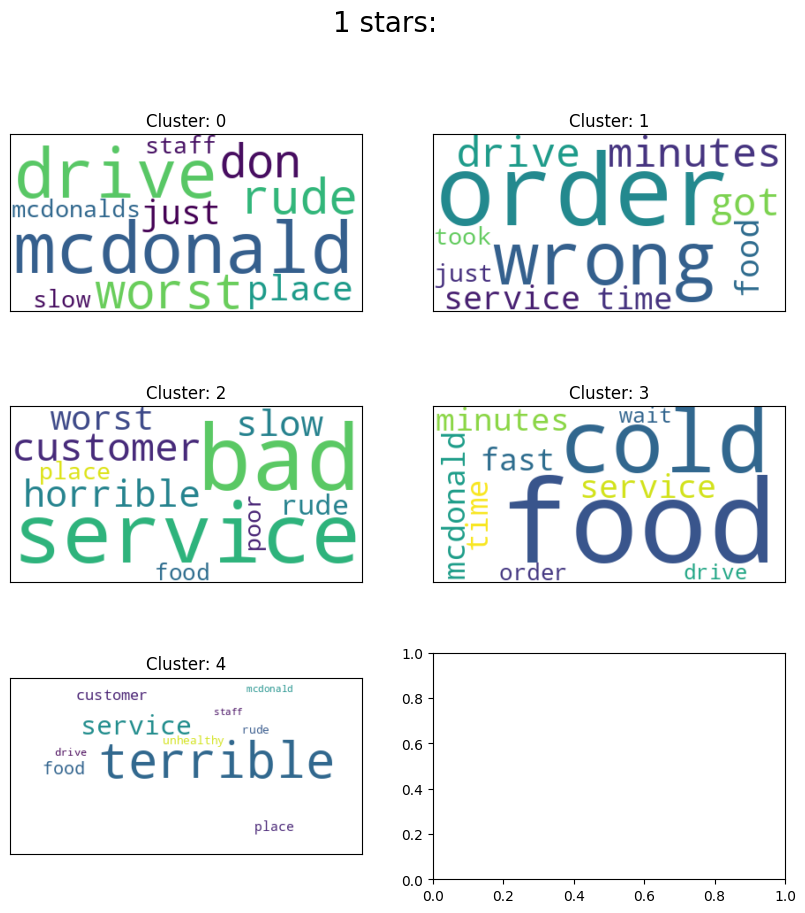

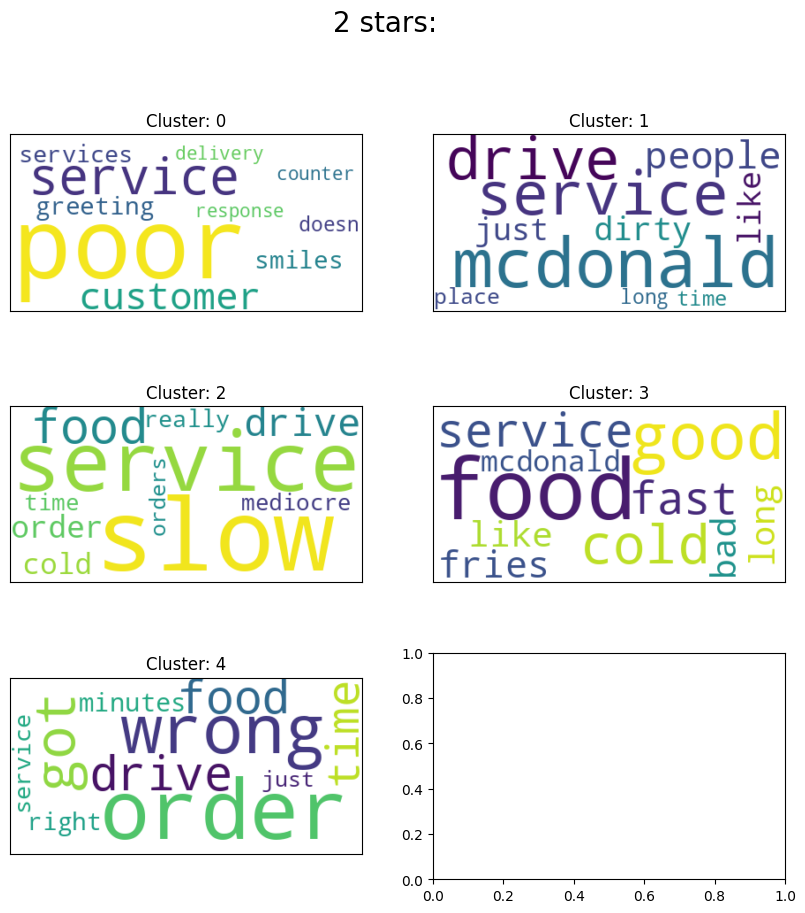

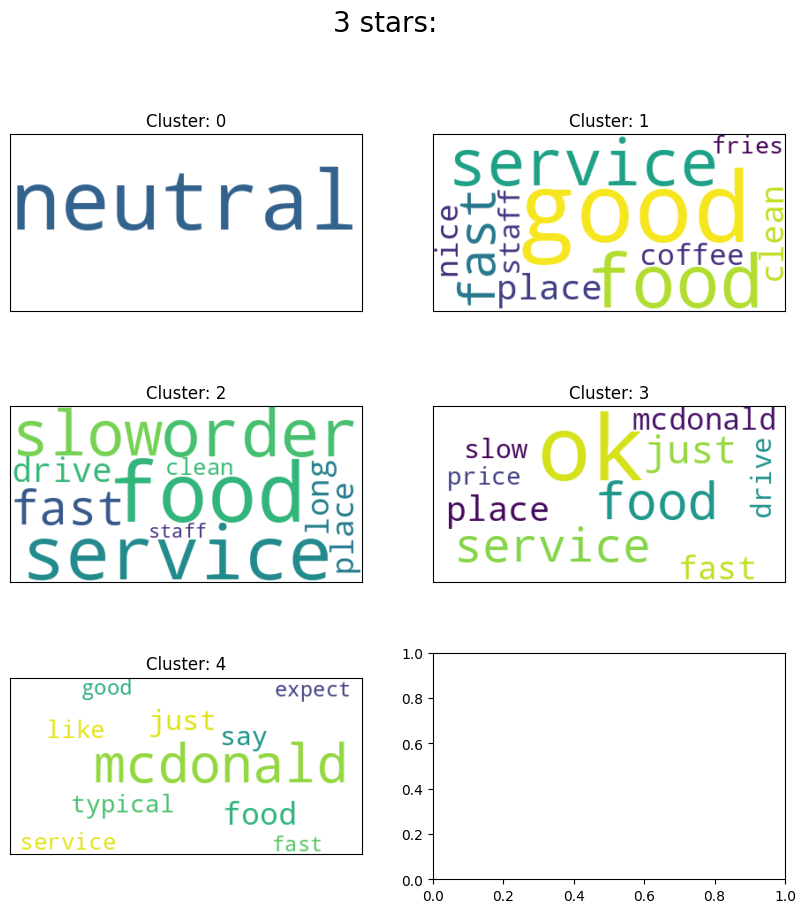

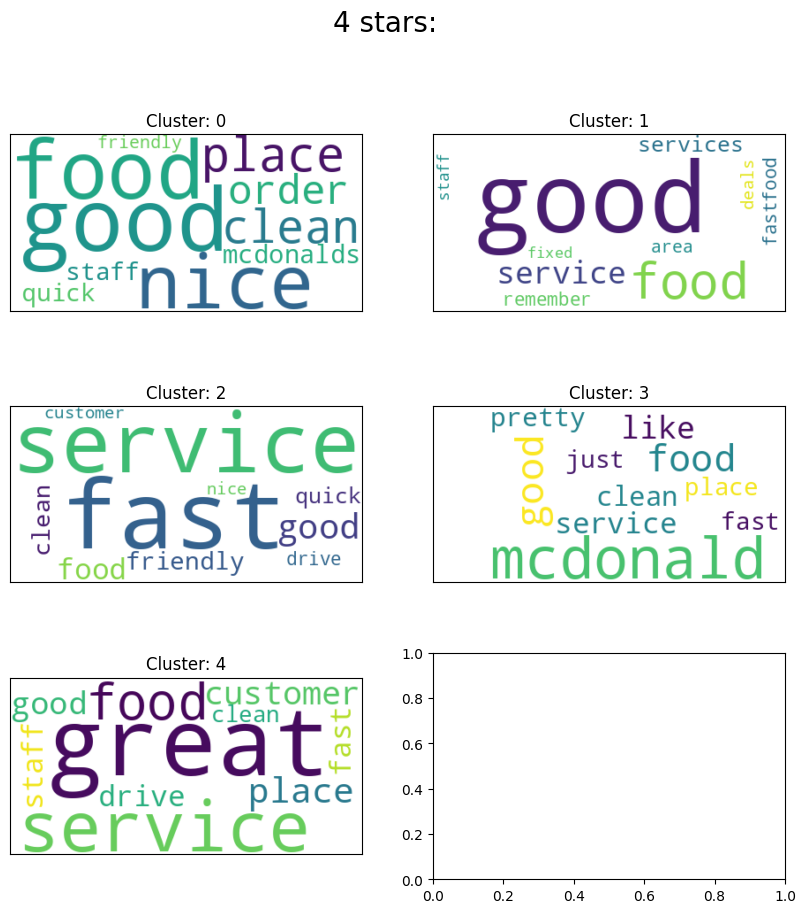

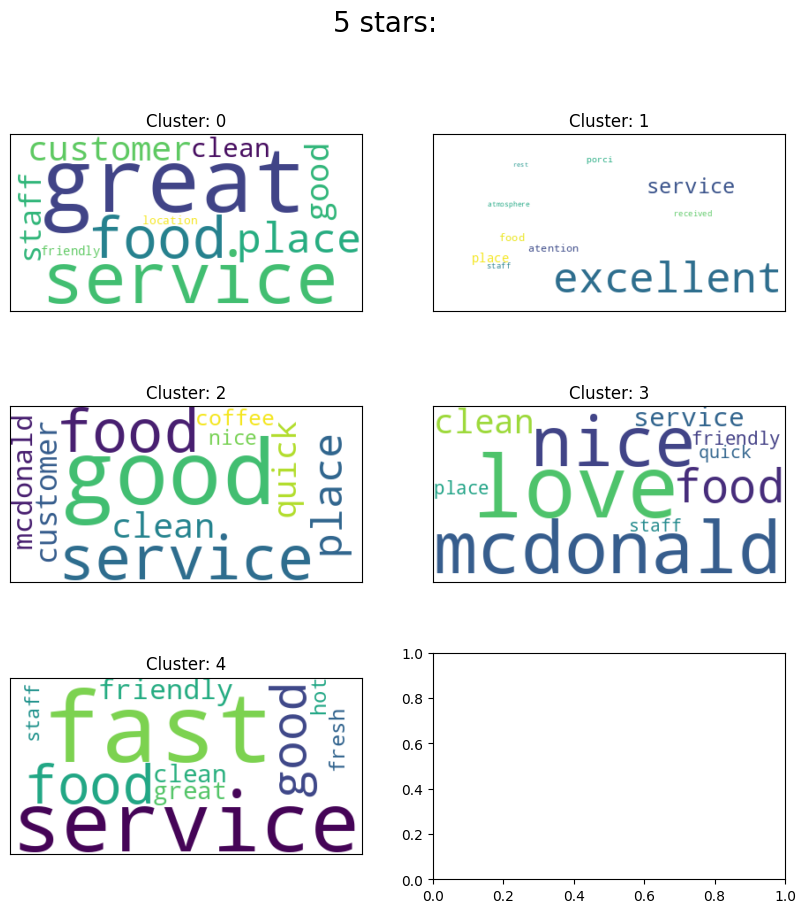

In [25]:
# all clusters wordclouds for each rating
for index, rating in enumerate(sorted(df.rating.unique())):
    grid_wordcloud(cluster_groups[index], rating_num=f'{rating} stars', rows=3, columns=2)

### Interpretation of WordCloud (K = 5)

1 star ratings:
* Cluster 0: People considered it to be the worst, the staff was rude, and the order was slow.
* Cluster 1: People received the wrong order and it took a long time to arrive.
* Cluster 2: Horrible food and rude and slow service. 
* Cluster 3: Slow service, had to wait a long time for their order, and the food came cold.
* Cluster 4: Terrible service and food.

2 star ratings:
* Cluster 0: Poor service with no smiles and didn't receive a response from delivery.
* Cluster 1: This cluster is a bit unclear, but overall it seems like the store was dirty and maybe the people were not very good.
* Cluster 2: Slow service and order took awhile, and the food was mediocre.
* Cluster 3: Good service but the food was bad and came cold.
* Cluster 4: People received the wrong order and it took awhile to arrive.

3 star ratings:
* Cluster 0: People had a neutral feeling towards the store.
* Cluster 1: The place was clean, the service was good, and they found the fries and coffee good.
* Cluster 2: It seems that either the service or food was good, with some saying the order was slow. The store was also clean.
* Cluster 3: The food, service and prices were ok, with some saying that the food came fast and others saying it came slow.
* Cluster 4: The service, food and store was what they expected or typical.

4 star ratings:
* Cluster 0: Friendly staff, orders came quick, clean store, and good food.
* Cluster 1: Good service that remebered the order, good food, deals, and area.
* Cluster 2: Clean store with friendly and nice service. Food was also good and came fast.
* Cluster 3: Fast and good service, clean and pretty store, and people enjoyed the food.
* Cluster 4: Great service, staff, food, and clean store.

5 star ratings: 
* Cluster 0: Great food, frienly staff and service, and great location.
* Cluster 1: Excellent service and food.
* Cluster 2: Clean store, nice food and coffee, and great service.
* Cluster 3: Friendly staff and service, clean store, and people loved the food.
* Cluster 4: Fast and friendly service, clean store, and great food that was fresh and hot.

The identified clusters here are not far from the clusters when the k value was 10. However, I would claim that a k value of 10 provides more specific insight to customer feedback; a k value of 5 provides too general insight. 

# Geographical analysis

This section focuses on providing a geographical visualization of the stores in the dataset, and seeing if there is a pattern of where the worst stores are located.

## Further inspecting dataset and cleaning 

In [26]:
df.head(10)

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,clean_review
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1,why does it look like someone spit on my food?...
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4,it'd mcdonalds. it is what it is as far as the...
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1,made a mobile order got to the speaker and che...
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5,my mc. crispy chicken sandwich was customer se...
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1,"i repeat my order 3 times in the drive thru, a..."
5,6,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 weeks ago,I work for door dash and they locked us all ou...,1,i work for door dash and they locked us all ou...
6,7,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,If I could give this location a zero on custo...,1,if i could give this location a zero on custom...
7,8,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a year ago,Came in and ordered a Large coffee w/no ice. T...,1,came in and ordered a large coffee w/no ice. t...
8,9,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Went thru drive thru. Ordered. Getting home no...,1,went thru drive thru. ordered. getting home no...
9,10,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,"I'm not really a huge fan of fast food, but I ...",4,"i'm not really a huge fan of fast food, but i ..."


In [27]:
# removing whitespace in latitude column name
df.rename({'latitude ': 'latitude'}, axis=1, inplace=True)
df.columns

Index(['reviewer_id', 'store_name', 'category', 'store_address', 'latitude',
       'longitude', 'rating_count', 'review_time', 'review', 'rating',
       'clean_review'],
      dtype='object')

In [28]:
# number of unique values for store_address
df['store_address'].nunique()

40

In [29]:
# number of unique values for latitude and longitude
df[['latitude', 'longitude']].nunique()

latitude     39
longitude    39
dtype: int64

In [30]:
# checking store_address for rows with missing entries of latitudes and longitudes
missing_coordinates = df[df['latitude'].isnull()] 
missing_coordinates

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,clean_review
22141,22142,McDonald's,Fast food restaurant,2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...,NaN,NaN,"2,175",3 months ago,Breakfast specials are good. The sausage burri...,4,breakfast specials are good. the sausage burri...
22142,22143,McDonald's,Fast food restaurant,2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...,NaN,NaN,"2,175",a year ago,This isn't your typical McDonald's. This place...,5,this isn't your typical mcdonald's. this place...
22143,22144,McDonald's,Fast food restaurant,2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...,NaN,NaN,"2,175",2 weeks ago,This place was serving good quality breakfast ...,4,this place was serving good quality breakfast ...
22144,22145,McDonald's,Fast food restaurant,2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...,NaN,NaN,"2,175",a month ago,I understand this is a very busy location but ...,1,i understand this is a very busy location but ...
22145,22146,McDonald's,Fast food restaurant,2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...,NaN,NaN,"2,175",2 months ago,"When I arrived at McDonald's, it was very crow...",4,"when i arrived at mcdonald's, it was very crow..."
...,...,...,...,...,...,...,...,...,...,...,...
27719,27720,ýýýMcDonald's,Fast food restaurant,2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...,NaN,NaN,"2,175",3 years ago,This McDonald's is across the street from Waik...,5,this mcdonald's is across the street from waik...
27720,27721,McDonald's,Fast food restaurant,2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...,NaN,NaN,"2,175",11 months ago,"Seems like, they always makes some mistakes wh...",2,"seems like, they always makes some mistakes wh..."
27721,27722,McDonald's,Fast food restaurant,2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...,NaN,NaN,"2,175",11 months ago,Convenient to the east end of Kalakaua Ave. Lo...,4,convenient to the east end of kalakaua ave. lo...
27722,27723,McDonald's,Fast food restaurant,2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...,NaN,NaN,"2,175",11 months ago,"Lost McDonald's in Honolulu, if you can avoid ...",1,"lost mcdonald's in honolulu, if you can avoid ..."


Something has happened to the store address where we can't verify the store address. Let us verify that all the missing values for the coordinates are associated with this unreadible address.

In [31]:
# seeing all missing entries have same unreadible store address
missing_coordinates['store_address'].nunique()

1

Since all missing coordinate values are associated with the unreadible address, let us try to gain information about the store location by looking at reviews.

In [32]:
# trying to decipher location through reviews 
missing_coordinates['review'][27721]

'Convenient to the east end of Kalakaua Ave. Long line in the morning for breakfast. Staff friendly and they can/will deliver to your table--which is the only reason I gave it 4 stars. Complaints: homeless person racked out at one of the ï¿½'

This review clearly indicates that the store is located around Kalakaua Avenue in Hawaii, which with a quick google map search provides us with two possibilities:
1. 2476 Kalākaua Ave, Honolulu, HI 96815, United States.
2. 2237 Kūhiō Ave., Honolulu, HI 96815, United States.

If we take a closer look at the unreadible address found in the dataset, we can see that it begins with 2476, which means that it must be the first address which has the coordinates: (21.274787724790357, -157.82415082172417). Let us fix the store_address and enter values for the latitude and longitude.

In [33]:
# replacing all store_addresses from missing_coordinates to the appriopiate address and coordinates
df.loc[df['latitude'].isnull(), 'store_address'] = '2476 Kalākaua Ave, Honolulu, HI 96815, United States'
df['latitude'] = df['latitude'].fillna(21.277479)
df['longitude'] = df['longitude'].fillna(-157.824151)


In [34]:
# verifying that there is no more missing values
df.isnull().sum()

reviewer_id      0
store_name       0
category         0
store_address    0
latitude         0
longitude        0
rating_count     0
review_time      0
review           0
rating           0
clean_review     0
dtype: int64

In [35]:
df[22141:27723]
# looks good !

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,clean_review
22141,22142,McDonald's,Fast food restaurant,"2476 Kalākaua Ave, Honolulu, HI 96815, United ...",21.277479,-157.824151,"2,175",3 months ago,Breakfast specials are good. The sausage burri...,4,breakfast specials are good. the sausage burri...
22142,22143,McDonald's,Fast food restaurant,"2476 Kalākaua Ave, Honolulu, HI 96815, United ...",21.277479,-157.824151,"2,175",a year ago,This isn't your typical McDonald's. This place...,5,this isn't your typical mcdonald's. this place...
22143,22144,McDonald's,Fast food restaurant,"2476 Kalākaua Ave, Honolulu, HI 96815, United ...",21.277479,-157.824151,"2,175",2 weeks ago,This place was serving good quality breakfast ...,4,this place was serving good quality breakfast ...
22144,22145,McDonald's,Fast food restaurant,"2476 Kalākaua Ave, Honolulu, HI 96815, United ...",21.277479,-157.824151,"2,175",a month ago,I understand this is a very busy location but ...,1,i understand this is a very busy location but ...
22145,22146,McDonald's,Fast food restaurant,"2476 Kalākaua Ave, Honolulu, HI 96815, United ...",21.277479,-157.824151,"2,175",2 months ago,"When I arrived at McDonald's, it was very crow...",4,"when i arrived at mcdonald's, it was very crow..."
...,...,...,...,...,...,...,...,...,...,...,...
27718,27719,McDonald's,Fast food restaurant,"2476 Kalākaua Ave, Honolulu, HI 96815, United ...",21.277479,-157.824151,"2,175",8 months ago,It's McDonald's... You know what you're gonna ...,4,it's mcdonald's... you know what you're gonna ...
27719,27720,ýýýMcDonald's,Fast food restaurant,"2476 Kalākaua Ave, Honolulu, HI 96815, United ...",21.277479,-157.824151,"2,175",3 years ago,This McDonald's is across the street from Waik...,5,this mcdonald's is across the street from waik...
27720,27721,McDonald's,Fast food restaurant,"2476 Kalākaua Ave, Honolulu, HI 96815, United ...",21.277479,-157.824151,"2,175",11 months ago,"Seems like, they always makes some mistakes wh...",2,"seems like, they always makes some mistakes wh..."
27721,27722,McDonald's,Fast food restaurant,"2476 Kalākaua Ave, Honolulu, HI 96815, United ...",21.277479,-157.824151,"2,175",11 months ago,Convenient to the east end of Kalakaua Ave. Lo...,4,convenient to the east end of kalakaua ave. lo...


## Geographical Analysis using Cartopy

### Visual representation of store location

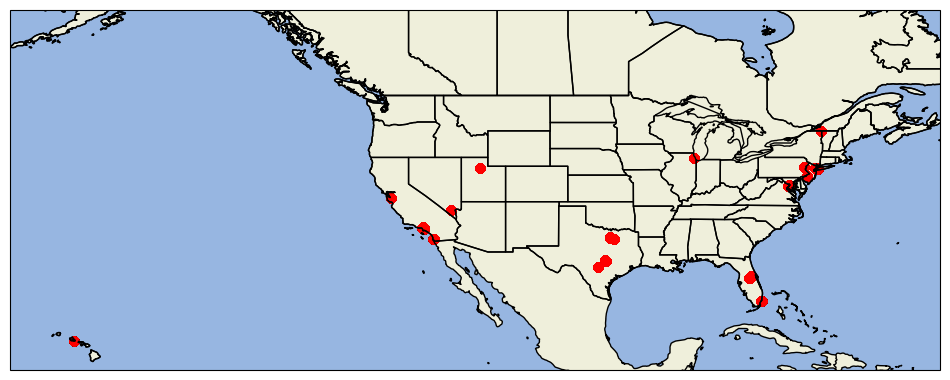

In [36]:
# visualize position of branches using cartopy
import cartopy
from cartopy.crs import PlateCarree

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=PlateCarree())

coordinates = [(latitude, longitude) for latitude, longitude in zip(df.latitude, df.longitude)]

latitudes, longitudes = np.array(coordinates).T
ax.scatter(longitudes, latitudes, color='red')

ax.coastlines()
ax.add_feature(cartopy.feature.STATES)
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND)
scale = (-165, -60, 18, 45)
ax.set_extent(scale)
plt.show()

### Investigating the average rating for each unique store

In [37]:
# count of reviews/ratings for each unique store 
df['store_address'].value_counts()

store_address
9814 International Dr, Orlando, FL 32819, United States                       1890
5725 W Irlo Bronson Memorial Hwy, Kissimmee, FL 34746, United States          1720
10901 Riverside Dr, North Hollywood, CA 91602, United States                  1710
1415 E State Rd, Fern Park, FL 32730, United States                           1700
632 S R L Thornton Freeway Service Rd, Dallas, TX 75203, United States        1650
3501 Biscayne Blvd, Miami, FL 33137, United States                            1570
621 Broadway, Newark, NJ 07104, United States                                 1290
1100 N US Hwy 377, Roanoke, TX 76262, United States                           1168
72-69 Kissena Blvd, Queens, NY 11367, United States                           1140
429 7th Ave, New York, NY 10001, United States                                1140
724 Broadway, New York, NY 10003, United States                               1140
By Mandalay Bay, 3999 S Las Vegas Blvd, Las Vegas, NV 89119, United State

In [38]:
# calculate average rating for each store

average_rating_by_store = {address:(df[df['store_address'] == address])['rating'].mean().round(2) for address in df['store_address'].unique()}
average_rating_by_store

{'13749 US-183 Hwy, Austin, TX 78750, United States': 3.19,
 '1698 US-209, Brodheadsville, PA 18322, United States': 3.46,
 '72-69 Kissena Blvd, Queens, NY 11367, United States': 3.29,
 '429 7th Ave, New York, NY 10001, United States': 3.69,
 '724 Broadway, New York, NY 10003, United States': 3.31,
 '160 Broadway, New York, NY 10038, United States': 2.33,
 '555 13th St NW, Washington, DC 20004, United States': 2.67,
 '10451 Santa Monica Blvd, Los Angeles, CA 90025, United States': 3.67,
 '114 Delancey St, New York, NY 10002, United States': 3.33,
 '5920 Balboa Ave, San Diego, CA 92111, United States': 3.6,
 '262 Canal St, New York, NY 10013, United States': 3.13,
 '490 8th Ave, New York, NY 10001, United States': 2.96,
 '550 Lawrence Expy, Sunnyvale, CA 94086, United States': 3.33,
 '11382 US-441, Orlando, FL 32837, United States': 3.16,
 '210 5th S, Salt Lake City, UT 84106, United States': 2.53,
 '1916 M St NW, Washington, DC 20036, United States': 3.6,
 "151 West 34th Street (Macy's

### Visualization based on average rating

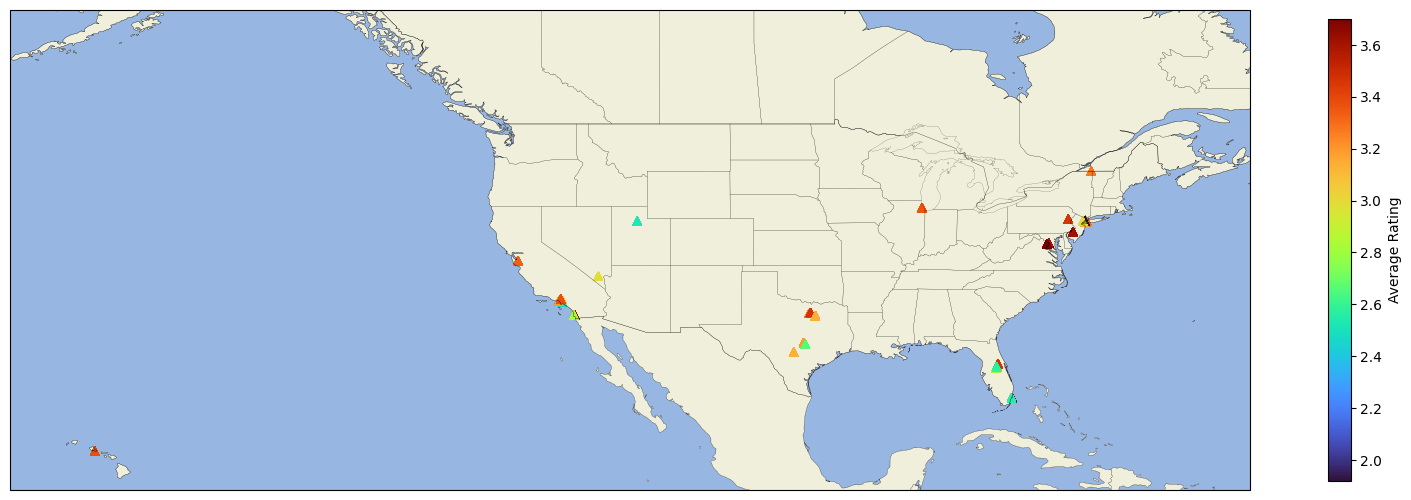

In [39]:
# modify cartopy to include average rating

plt.figure(figsize=(20, 12))
ax = plt.axes(projection=PlateCarree())

coordinates = [(latitude, longitude) for latitude, longitude in zip(df.latitude, df.longitude)]

latitudes, longitudes = np.array(coordinates).T
sc = ax.scatter(longitudes, latitudes, c=[average_rating_by_store.get(store_address) for store_address in df['store_address']], cmap='turbo', s=30, marker='^')

clb = plt.colorbar(sc, shrink=0.5, label='Average Rating')

ax.coastlines(linewidth=0.2)
ax.add_feature(cartopy.feature.STATES, linewidth=0.1)
ax.add_feature(cartopy.feature.BORDERS, linewidth=0.2)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND)
scale = (-165, -60, 18, 45)
ax.set_extent(scale)